In [1]:
from os import listdir
import jsonlines
import sklearn
import itertools
from tqdm import tqdm
from tqdm import trange
from sklearn.preprocessing import MultiLabelBinarizer
import re
import nltk
import pymorphy2 as pm
import networkx as nx
import re
import matplotlib.pyplot as plt

tknzr = nltk.TweetTokenizer()
#nltk.download()

## Достаём связи между категориями
(node_2_id) $\rightarrow$ (node_1_id)

In [2]:
links = [link for link in tqdm(jsonlines.open('links/link_directed.txt', 'r'))]

719813it [00:05, 136217.32it/s]


In [3]:
categories_id_dict = {}
for link in tqdm(links):
    categories_id_dict[link['node_1_id']] = re.sub(r'^Категория:', '', link['node_1_title'])
    categories_id_dict[link['node_2_id']] = re.sub(r'^Категория:', '', link['node_2_title'])

100%|██████████████████████████████████████████████████████████████████████| 719813/719813 [00:03<00:00, 202968.44it/s]


In [4]:
categories_forest = nx.DiGraph()
categories_forest.add_edges_from([(link['node_2_id'], link['node_1_id']) for link in links])

print("Number of nodes:", categories_forest.number_of_nodes())
print("Number of edges:", categories_forest.number_of_edges())
print("Is it a forest?", nx.is_forest(categories_forest))
print("Connected components:", nx.number_weakly_connected_components(categories_forest))

Number of nodes: 344614
Number of edges: 719389
Is it a forest? False
Connected components: 58


In [5]:
components = list(nx.weakly_connected_component_subgraphs(categories_forest))

In [6]:
for c in components:
    roots = []
    for node in list(c.nodes):
        if len(list(c.predecessors(node))) == 0:
            roots.append(node)
            
    print([categories_id_dict[root] for root in roots])
            

['Всё', 'Футбол в Арубе ', 'Википедия:Переименованные категории со статьями', 'Википедия:Перевод', 'Википедия:Проблемы с шаблонами', 'Избранные статьи по проектам', 'Хорошие статьи по проектам', 'Статьи проекта Подводные лодки по уровню', 'Статьи проекта Подводные лодки по важности', 'Википедия:Статьи с утверждениями без источников', 'Незавершённые статьи о вооруженных силах Третьего рейха', 'Статьи проекта Санкт-Петербург по качеству', 'Статьи проекта Речное пароходство по уровню', 'Статьи проекта Речное пароходство по важности', 'Статьи проекта Современное искусство по уровню', 'Статьи проекта Современное искусство по важности', 'Статьи проекта Наука по качеству', 'Статьи проекта Территории с нечётким правовым статусом по качеству', 'Статьи проекта Фармация по уровню', 'Статьи проекта Фармация по важности', 'Статьи проекта Казахстан по качеству', 'Статьи проекта Казахстан по важности', 'Статьи проекта Крейсера по важности', 'Статьи проекта Крейсера по уровню', 'Статьи проекта Футбол 


['Статьи проекта Россия II уровня']
['Статьи проекта Наука по качеству и важности']
['Статьи проекта История России неизвестного уровня']
['Статьи проекта Русский рок I уровня']
['Статьи проекта Дания II уровня']
['Статьи проекта Монголия низкой важности']
['Статьи проекта История России I уровня']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Хорошие статьи проекта История России']
['Избранные статьи проекта История России']
['Статьи проекта Военная история II уровня']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Статьи проекта Антарктика II уровня']
['Статьи проекта Антарктика III уровня']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [7]:
for i in range(len(components)):
    print(i)
    print("Number of nodes:", components[i].number_of_nodes())
    print("Number of edges:", components[i].number_of_edges())

0
Number of nodes: 344531
Number of edges: 719318
1
Number of nodes: 6
Number of edges: 5
2
Number of nodes: 2
Number of edges: 1
3
Number of nodes: 4
Number of edges: 3
4
Number of nodes: 4
Number of edges: 3
5
Number of nodes: 2
Number of edges: 1
6
Number of nodes: 2
Number of edges: 1
7
Number of nodes: 4
Number of edges: 3
8
Number of nodes: 1
Number of edges: 1
9
Number of nodes: 1
Number of edges: 1
10
Number of nodes: 1
Number of edges: 1
11
Number of nodes: 1
Number of edges: 1
12
Number of nodes: 1
Number of edges: 1
13
Number of nodes: 1
Number of edges: 1
14
Number of nodes: 1
Number of edges: 1
15
Number of nodes: 1
Number of edges: 1
16
Number of nodes: 1
Number of edges: 1
17
Number of nodes: 1
Number of edges: 1
18
Number of nodes: 1
Number of edges: 1
19
Number of nodes: 1
Number of edges: 1
20
Number of nodes: 1
Number of edges: 1
21
Number of nodes: 1
Number of edges: 1
22
Number of nodes: 2
Number of edges: 2
23
Number of nodes: 1
Number of edges: 1
24
Number of nod

### Поняли, что нас интересует только первая компонента, где есть Категория:Всё

In [19]:
root = 0
def srch_by_ttl(ttl):
    for id, title in categories_id_dict.items():
        if title == ttl:
            print(id)
            return id

root = srch_by_ttl('Всё')

def del_by_ttls(ttls):
    for ttl in ttls:
        components[0].remove_node(srch_by_ttl(ttl))
        
   
del_by_ttls(['Википедия:Служебные', 'Скрытые категории'])
'''
for id, title in categories_id_dict.items():
    if title == 'Википедия:Служебные':
        print(id)
        components[0].remove_node(id)
        break'''

16350
7938
1031457


"\nfor id, title in categories_id_dict.items():\n    if title == 'Википедия:Служебные':\n        print(id)\n        components[0].remove_node(id)\n        break"

In [20]:
class BuldTaxonomy():
    def __init__(self, graph, root):
        self.original_graph = graph
        self.output_graph = nx.DiGraph()
        self.stack = [root]
        
    '''
    def build_graph_recursive(self, node):
        successors = list(self.original_graph.successors(node))
        if len(successors) == 0:
            return
        else:
            for pred in successors:
                self.output_graph.add_edge(node, succ)
                self.buld_graph_recursive(succ)
    '''
    
    def build_graph(self):
        while self.stack:
            node = self.stack.pop()
            successors = list(self.original_graph.successors(node))
            for succ in successors:
                if (node, succ) not in self.output_graph.edges():
                    self.output_graph.add_edge(node, succ)
                    self.stack.append(succ)

In [21]:
taxonomy = BuldTaxonomy(components[0], root)
taxonomy.build_graph()
cat_graph = taxonomy.output_graph

print("Number of nodes:", cat_graph.number_of_nodes())
print("Number of edges:", cat_graph.number_of_edges())

Number of nodes: 316892
Number of edges: 667517


5861034


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Nodes: 132


<IPython.core.display.Javascript object>


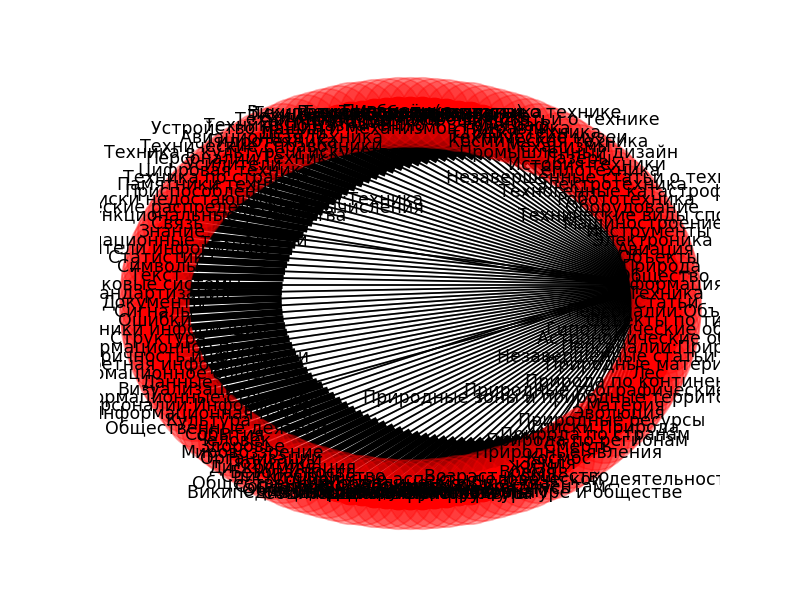

In [23]:
%matplotlib notebook

# Википедия:Категории, объединённые по внутренним признакам
nodes = [srch_by_ttl('Статьи')]
lil_graphy = nx.DiGraph()
for i in trange(2):
    new_nodes = []
    for node in nodes:
        successors = list(cat_graph.successors(node))
        new_nodes.extend(successors)
        for succ in successors:
            lil_graphy.add_edge(categories_id_dict[node], categories_id_dict[succ])
    nodes = new_nodes
    
print('Nodes:', lil_graphy.number_of_nodes())
pos = nx.circular_layout(lil_graphy)
nx.draw_networkx_nodes(lil_graphy,pos,node_size=1600, 
                           alpha=0.3, node_color='red')
nx.draw_networkx_edges(lil_graphy,pos,width=1,
                           alpha=0.3,edge_color='black')
nx.draw_networkx_labels(lil_graphy, pos,font_size=10,
                            font_family='sans-serif')
nx.draw(lil_graphy, pos)
plt.show()

## Собственно, анализ

In [19]:
path = listdir('c')
path = sorted(path)
path = path[:4]
print(path)

data = []
for p in path:
    with jsonlines.open('c/' + p, 'r') as f:
        for entry in f:
            data.append(entry)

['AA', 'AB', 'AD', 'AE']


In [20]:
categories_y = [d['categories'] for d in data]
categories = sorted(set(list(itertools.chain(*categories_y))))

categories_dict = {c: 0 for c in categories}
for d in data:
    for c in d['categories']:
        if categories_dict.get(c) is not None:
            categories_dict[c] += 1
            
ok = [c for c in categories if categories_dict[c] > 5 and categories_dict[c] < 5000]
categories_y = [[c for c in cy if c in ok] for cy in tqdm(categories_y)]
len(ok)

100%|██████████████████████████████████████████████████████████████████████████| 35669/35669 [00:13<00:00, 2581.66it/s]


4781

In [21]:
y = MultiLabelBinarizer().fit_transform(categories_y)

In [24]:
words = []
texts = []
for d in tqdm(data):

    text = re.sub(r'\n+', '. ', d['text'])
    text = re.sub(r'\xa0', ' ', text)
    tokens = tknzr.tokenize(text=text)
    tokens = [t.lower() for t in tokens]     #  if t.isalnum()
    text = ' '.join(tokens)
    texts.append(text)
    words.extend(sorted(set([t for t in tokens if t.isalpha()])))

words = sorted(set(words))

  0%|                                                                                        | 0/35669 [00:00<?, ?it/s]


NameError: name 'tknzr' is not defined

In [ ]:
normal_forms = {}
for w in tqdm(words):
    nf = morph.parse(w)[0].normal_form
    normal_forms[w] = nf

In [ ]:
for i in trange(texts):
    text = texts[i]
    tokens = re.split(r' ', text)
    tokens = [normal_forms.get(t) for t in tokens if normal_forms.get(t) is not None]
    text = ' '.join(tokens)
    texts[i] = text


## Черновик
.

.

.

['B']
[('A', 'B'), ('B', 'C')]


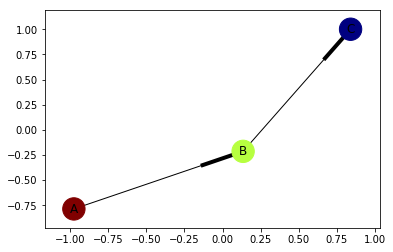

In [53]:
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from([('A','B'), ('B','C')])

print(list(G.predecessors('C')))
print(G.edges())

val_map = {'A': 1.0,
           'B': 0.5714285714285714,
           'C': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

In [58]:
a = [1, 2, 4]
while a:
    print(a.pop())

4
2
1
